In [1]:
import pandas as pd

### Load the  Data

In [2]:
Fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

In [3]:
Fake['label']=0

In [4]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
true['label']=1

In [6]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [8]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [10]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [11]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [12]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
News.duplicated().sum()

6251

In [14]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import zipfile
import os

# --- NLTK Setup and Data Unzipping (Corrected) ---

download_dir = "/kaggle/working/nltk_data/"
os.makedirs(download_dir, exist_ok=True)
nltk.data.path.append(download_dir)

# Download necessary NLTK packages
nltk.download('wordnet', download_dir)
nltk.download('omw-1.4', download_dir)
nltk.download('punkt', download_dir)
nltk.download('stopwords', download_dir)

def unzip_nltk_data(package_name, target_dir):
    zip_path = os.path.join(target_dir, 'corpora', f'{package_name}.zip')
    extract_path = os.path.join(target_dir, 'corpora')

    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
        except Exception:
            pass

unzip_nltk_data('wordnet', download_dir)
unzip_nltk_data('omw-1.4', download_dir)

# Initialize tools globally for the function to use
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


# --- Text Preprocessing Function (Refined) ---

def process_text(text):
    # Ensure input is treated as a string
    text = str(text)

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove all non-alphabetic characters (preserving spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3. Remove single characters and extra white space
    # Remove all single characters from text (e.g., 'a', 'b', 'c')
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    # Remove extra white space from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # 4. Tokenize the text
    words = word_tokenize(text)

    # 5. Lemmatization, Stop Word Removal, and Length Filtering
    processed_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words and len(word) > 3 # Filter stop words and short words
    ]

    # 6. Return the tokens joined back into a single string for vectorization
    return " ".join(processed_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import zipfile
import os

# --- NLTK Setup and Data Downloads (Robust to handle different environments) ---

# Define a custom path for downloads, often necessary in environments like Kaggle/Colab
download_dir = "/kaggle/working/nltk_data/"
os.makedirs(download_dir, exist_ok=True)
nltk.data.path.append(download_dir)

# Download all necessary NLTK packages
print("Downloading NLTK resources...")
try:
    nltk.download('wordnet', download_dir)
    nltk.download('omw-1.4', download_dir)
    nltk.download('punkt', download_dir)
    nltk.download('stopwords', download_dir)
    print("NLTK downloads complete.")
except Exception as e:
    print(f"Error during NLTK download: {e}")
    # Proceed, but extraction might still be needed

# Function to manually unzip packages if the environment requires it (like your initial setup)
def unzip_nltk_data(package_name, target_dir):
    zip_path = os.path.join(target_dir, 'corpora', f'{package_name}.zip')
    extract_path = os.path.join(target_dir, 'corpora')

    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Unzipped {package_name}.")
        except Exception:
            pass

unzip_nltk_data('wordnet', download_dir)
unzip_nltk_data('omw-1.4', download_dir)

# Initialize global tools after downloads are confirmed
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


# --- Text Preprocessing Function (Refined) ---

def process_text(text):
    """
    Cleans, tokenizes, lemmatizes, and removes stop words/short words from text.
    Returns the processed text as a single string.
    """
    # Ensure input is treated as a string
    text = str(text)

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove all non-alphabetic characters (preserving spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3. Remove single characters and extra white space
    # Remove all single characters from text (e.g., 'a', 'b', 'c')
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    # Remove extra white space from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # 4. Tokenize the text
    words = word_tokenize(text)

    # 5. Lemmatization, Stop Word Removal, and Length Filtering
    processed_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words and len(word) > 3 # Filter stop words and short words
    ]

    # 6. Return the tokens joined back into a single string for vectorization
    return " ".join(processed_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!


NLTK downloads complete.
Unzipped wordnet.
Unzipped omw-1.4.


In [17]:
import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

# --- 1. SIMPLIFIED NLTK DOWNLOADS ---
# This uses the default NLTK path, which is usually more reliable for PunktTokenizer.

print("Attempting simplified NLTK downloads...")
# If these files are already downloaded, NLTK will confirm they are up to date.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
print("NLTK initialization complete.")

# --- 2. Initialize tools globally ---
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# --- 3. Text Preprocessing Function ---

def process_text(text):
    """
    Cleans, tokenizes, lemmatizes, and removes stop words/short words from text.
    Returns the processed text as a single string.
    """
    # Ensure input is treated as a string
    text = str(text)

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove all non-alphabetic characters (preserving spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3. Remove single characters and extra white space
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # 4. Tokenize the text (The line that caused the error)
    words = word_tokenize(text)

    # 5. Lemmatization, Stop Word Removal, and Length Filtering
    processed_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words and len(word) > 3
    ]

    # 6. Return the tokens joined back into a single string for vectorization
    return " ".join(processed_words)

# --- Test the function with a sample ---
sample_text = "The quick brown fox jumps over the lazy dog, 123 times a day!"
print("\nTesting the function:")
print(f"Original: {sample_text}")
print(f"Processed: {process_text(sample_text)}")

Attempting simplified NLTK downloads...


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krsum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krsum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krsum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krsum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\krsum\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK initialization complete.

Testing the function:
Original: The quick brown fox jumps over the lazy dog, 123 times a day!
Processed: quick brown jump lazy time


In [18]:
x=News.drop('label',axis=1)
y=News.label

In [ ]:
texts=list(x['text'])

ValueError: Unsupported key type for array slice. Received: `text`

In [20]:
cleaned_text = [process_text(text) for text in texts]

In [21]:
print(cleaned_text[:10])

['donald trump wish american happy year leave instead give shout enemy hater dishonest fake news medium former reality show star country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy year bishop talbert swan talbertswan december like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december us word hater year wish marlene marlen

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [23]:
!pip install tensorflow

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 90788


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



In [27]:
y.value_counts()

label
1    21192
0    17455
Name: count, dtype: int64

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam



In [29]:
inputt=Input(shape=(maxlen,))
learning_rate = 0.0001
x=Embedding(v+1,100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


-make label encoder to the labels to pass it to the model:

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


transform it to be categorical

In [31]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# train the model:

In [32]:

history = model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))


Epoch 1/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 430s 434ms/step - accuracy: 0.8462 - loss: 0.3304 - val_accuracy: 0.9587 - val_loss: 0.1525
Epoch 2/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 464s 480ms/step - accuracy: 0.9719 - loss: 0.0921 - val_accuracy: 0.9715 - val_loss: 0.1160
Epoch 3/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 441s 417ms/step - accuracy: 0.9844 - loss: 0.0524 - val_accuracy: 0.9708 - val_loss: 0.1064
Epoch 4/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 359s 371ms/step - accuracy: 0.9909 - loss: 0.0317 - val_accuracy: 0.9706 - val_loss: 0.0792
Epoch 5/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 354s 366ms/step - accuracy: 0.9940 - loss: 0.0215 - val_accuracy: 0.9719 - val_loss: 0.0759
Epoch 6/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 356s 368ms/step - accuracy: 0.9956 - loss: 0.0164 - val_accuracy: 0.9723 - val_loss: 0.0800
Epoch 7/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 348s 360ms/step - accuracy: 0.9972 - loss: 0.0099 - val_accuracy: 0.9709 - val_loss: 0.0875
Epoch 8/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 393s 368ms/step - accuracy: 0.9979 -

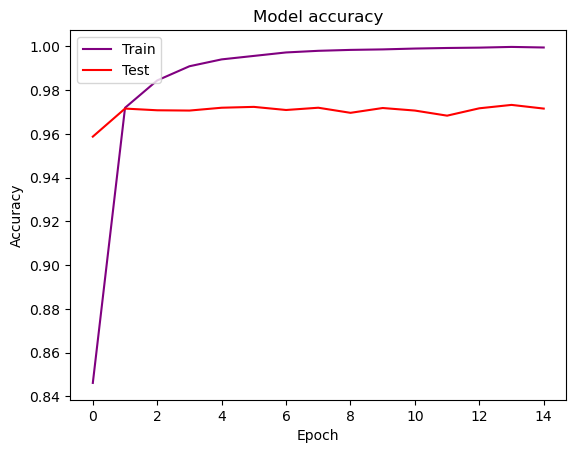

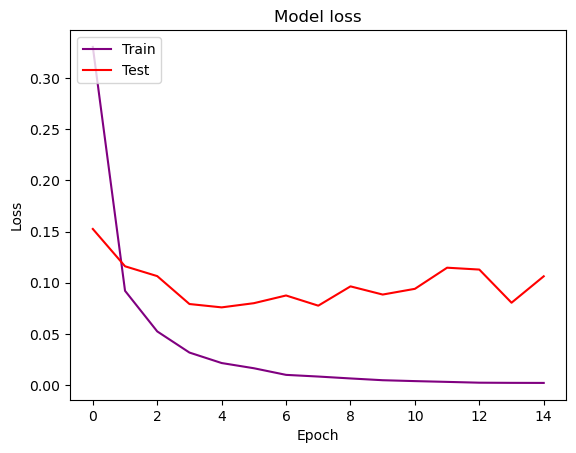

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],color='Purple')
plt.plot(history.history['val_accuracy'],color='Red')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],color='Purple')
plt.plot(history.history['val_loss'],color='Red')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Accuracy:

In [39]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9715 - loss: 0.1063
Test Loss: 0.10626979917287827
Test Accuracy: 0.9715394377708435


242/242 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step


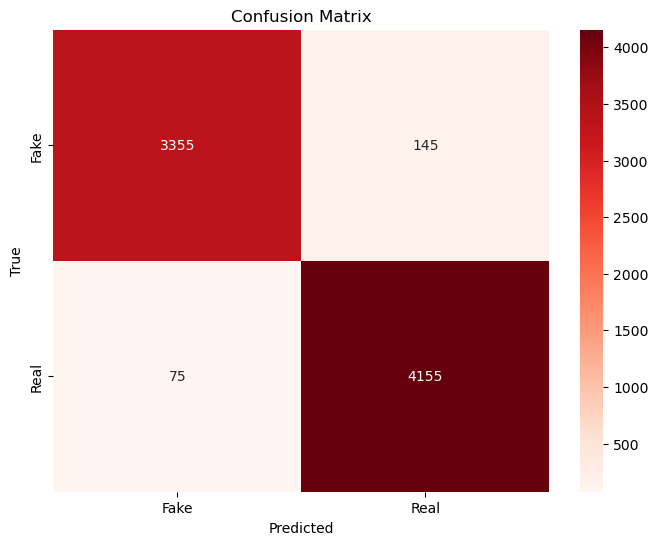

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
